## Mass of Sgr A*
### Kimber, C; Lovato, A

In [123]:
%pylab notebook

Populating the interactive namespace from numpy and matplotlib


We believe today that most galaxies have a supermassive black hole at their center. At the center of the Milky Way, there is a compact radio source called Sgr A*, which has long been suspected to mark the position of the central black hole. The center of the Milky Way is 8kpc from the Sun.

In 2002, a team of astronomers reported infrared adaptive optics observations which achieved angular resolution near the diffraction limit towards the star S2 near the radio source SgrA*. The positions of this star of a period of about 10 years are given. 

Assuming the motion of S2 arises from an elliptical orbit around the central black hole, we will derive its mass from this data.

#### Constants
Here a few useful constants are defined. First is the conversion from arcsec to rad, then the conversion from arcsec to astronomical units at a distance of 8kpc. 

In [124]:
arcsec_to_rad = pi/648000
rad_to_au     = 8 * 2.063E8
arcsec_to_au  = arcsec_to_rad * rad_to_au
au_to_mpc     = 4.848E-12

#### Data

The data are listed below. These data are the astrometry of S2 about some point (0, 0), which is assumed to be the location of Sgr A*.

In [125]:
x  = [0.104, 0.097, 0.087, 0.075, 0.077, 0.052, 0.036, 0.022, 0.000, -0.013, -0.026, -0.013, -0.007, 0.009, 0.032, 0.037, 0.072, 0.077, 0.081 ]
dx = [0.003, 0.003, 0.002, 0.007, 0.002, 0.004, 0.001, 0.004, 0.002, 0.003, 0.002, 0.005, 0.003, 0.003, 0.002, 0.002, 0.001, 0.002, 0.002]
y  = [-0.0166, -0.189, -0.192, -0.197, -0.193, -0.183, -0.167, -0.156, -0.103, -0.113, -0.068, 0.003,0.016,0.023, 0.016, 0.009, -0.024, -0.030, -0.036]
dy = [0.004, 0.004, 0.003, 0.010, 0.003, 0.006, 0.002, 0.006, 0.003, 0.004, 0.003, 0.007, 0.004, 0.005, 0.003, 0.003, 0.002, 0.002, 0.002]

#### Semimajor axis
These two 'dummy lists' just hold points that we use to turn into the semimajor axis of the orbit. The calculations in the following two cells give the semimajor and semiminor axes in astronomical unints. These points were selected because they were almost half an orbital period away from each other, and are closely representative of Periastron and Aphastron.

In [126]:
distx = [-0.013, 0.097]
disty = [0.003, -0.189]

In [127]:
x_a   = (distx[1]+distx[0])/2
y_a   = (disty[1]+disty[0])/2
a     = (x_a**2 + y_a**2)**(1/2) * arcsec_to_au
print("The semimajor axis of star S2 about SagA* is %2.2E AU or %2.2E Mpc" % (a, a*au_to_mpc))

The semimajor axis of star S2 about SagA* is 8.16E+02 AU or 3.96E-09 Mpc


In [128]:
semiminor_x = [x_a, 0.022]
semiminor_y = [y_a, -0.156]
x_b         = (semiminor_x[1]+semiminor_y[0])/2
y_b         = (y_a - (semiminor_y[1]))/2
b           = (x_b**2 + y_b**2)**(1/2) * arcsec_to_au
print("The semiminor axis of star S2 about SagA* is %2.2E AU or %2.2E Mpc" % (b, b*au_to_mpc))

The semiminor axis of star S2 about SagA* is 3.80E+02 AU or 1.84E-09 Mpc


#### Kepler's Second Law

Knowing Kepler's Second Law, we calculate the orbital period in years here. 

In [129]:
day   = y[-2]-y[-1]                                   
da    = (1/2 * (day * pi/648000 * 8 * 2.06E8) * 300 ) 
area  = pi * a * b                                    
dt    = 0.101
P     = (area * dt/da)
print("The orbital period is %2.2f years" % P)

The orbital period is 13.68 years


#### Plot

Here, these data are plotted along with some other important points.

<IPython.core.display.Javascript object>


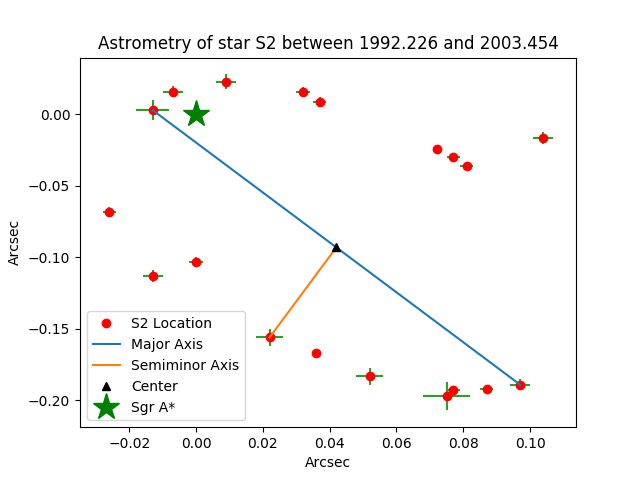

In [130]:
plt.plot(x, y, 'ro')
plt.plot(distx,disty)
plt.plot(semiminor_x, semiminor_y)
plt.plot(x_a,y_a, 'k^')
plt.plot(0,0, 'g*', markersize = 20)
plt.errorbar(x, y, xerr = dx, yerr = dy, linestyle = "None")
plt.title("Astrometry of star S2 between 1992.226 and 2003.454")
plt.xlabel("Arcsec")
plt.ylabel("Arcsec")
plt.legend(['S2 Location', "Major Axis", "Semiminor Axis", "Center", "Sgr A*"]);

In [131]:
mass_index = (a)**3/(P)**2
print("The combined masses of S2 and Sgr A* is then %2.2E solar masses" % mass_index)

The combined masses of S2 and Sgr A* is then 2.91E+06 solar masses


<h4>Questions and Discussion</h4>

c) Using Kepler's Second Law, we calculated an orbital period of $13.68$ years

d) The combined masses are $2.91 \times 10^6m_{\odot}$

There is one glaring flaw with our calculations, and that is that our semimajor axis doesn't pass through one focus of the orbit. We feel that this set of data and the values accepted in literature for orbital parameters fit more closely with the semimajor axis we used, but below we will recalculate the parameters using a semimajor axis passing through the black hole. In the following calculations, the p suffix will refer to the 'prime' calculations, where the semimajor axis passes through the Sgr A*

The semimajor axis of star S2 about SagA* is 7.80E+02 AU or 3.78E-09 Mpc
The semiminor axis of star S2 about SagA* is 3.79E+02 AU or 1.84E-09 Mpc
The orbital period is 13.06 years


<IPython.core.display.Javascript object>


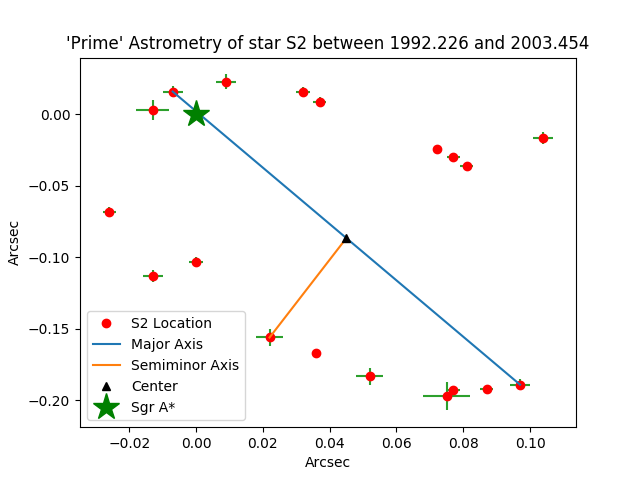

In [132]:
distxp = [-0.007, 0.097]
distyp = [0.016, -0.189]

x_ap   = (distxp[1]+distxp[0])/2
y_ap   = (distyp[1]+distyp[0])/2
ap     = (x_ap**2 + y_ap**2)**(1/2) * arcsec_to_au
print("The semimajor axis of star S2 about SagA* is %2.2E AU or %2.2E Mpc" % (ap, ap*au_to_mpc))

semiminor_xp = [x_ap, 0.022]
semiminor_yp = [y_ap, -0.156]
x_bp         = (semiminor_xp[1]+semiminor_yp[0])/2
y_bp         = (y_ap - (semiminor_yp[1]))/2
bp           = (x_bp**2 + y_bp**2)**(1/2) * arcsec_to_au
print("The semiminor axis of star S2 about SagA* is %2.2E AU or %2.2E Mpc" % (bp, bp*au_to_mpc))

dayp   = y[-2]-y[-1]                                   
dap    = (1/2 * (dayp * pi/648000 * 8 * 2.06E8) * 300 ) 
areap  = pi * ap * bp                                    
dtp    = 0.101
Pp     = (areap * dtp/dap)
print("The orbital period is %2.2f years" % Pp)

plt.plot(x, y, 'ro')
plt.plot(distxp,distyp)
plt.plot(semiminor_xp, semiminor_yp)
plt.plot(x_ap,y_ap, 'k^')
plt.plot(0,0, 'g*', markersize = 20)
plt.errorbar(x, y, xerr = dx, yerr = dy, linestyle = "None")
plt.title("'Prime' Astrometry of star S2 between 1992.226 and 2003.454")
plt.xlabel("Arcsec")
plt.ylabel("Arcsec")
plt.legend(['S2 Location', "Major Axis", "Semiminor Axis", "Center", "Sgr A*"]);